# Import libraries

In [1118]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import data

In [1119]:
data = pd.read_csv("/content/customer_churn.csv")

# Basic info

In [1120]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1121]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])
data.shape

Number of rows: 7043
Number of columns: 21


(7043, 21)

In [1122]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1123]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [1124]:
# Replace empty strings with NaN before converting to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype(np.float64)

16 object type column excluding customer id
4 numerical column

In [1125]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7036.000000,7030.000000,7027.000000,7025.000000
mean,0.162024,32.367568,64.757855,2283.229502
std,0.368499,24.560644,30.091845,2266.667296
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.300000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3795.450000
max,1.000000,72.000000,118.750000,8684.800000


- most values in SeniorCitizen column are 0 and the value ranges from 0 to 1



In [1126]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7030,7030,7006,7028,7028,7028,7028,7021,7029,7018,7029,7042,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6349,3382,3081,3492,3083,3090,3466,2802,2780,3860,4165,2365,5174


In [1127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


# Handling missing values

In [1128]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [1129]:
num_col = data.select_dtypes(include=['int64','float64','int32']).columns
num_col
data[num_col].skew()

,0
SeniorCitizen,1.834861
tenure,0.239852
MonthlyCharges,-0.220178
TotalCharges,0.961148


# If skewness is greater than ±0.5, the feature is skewed,median is a better choice

here altho seniorcitizen is numberic it is binary value so mode can be used

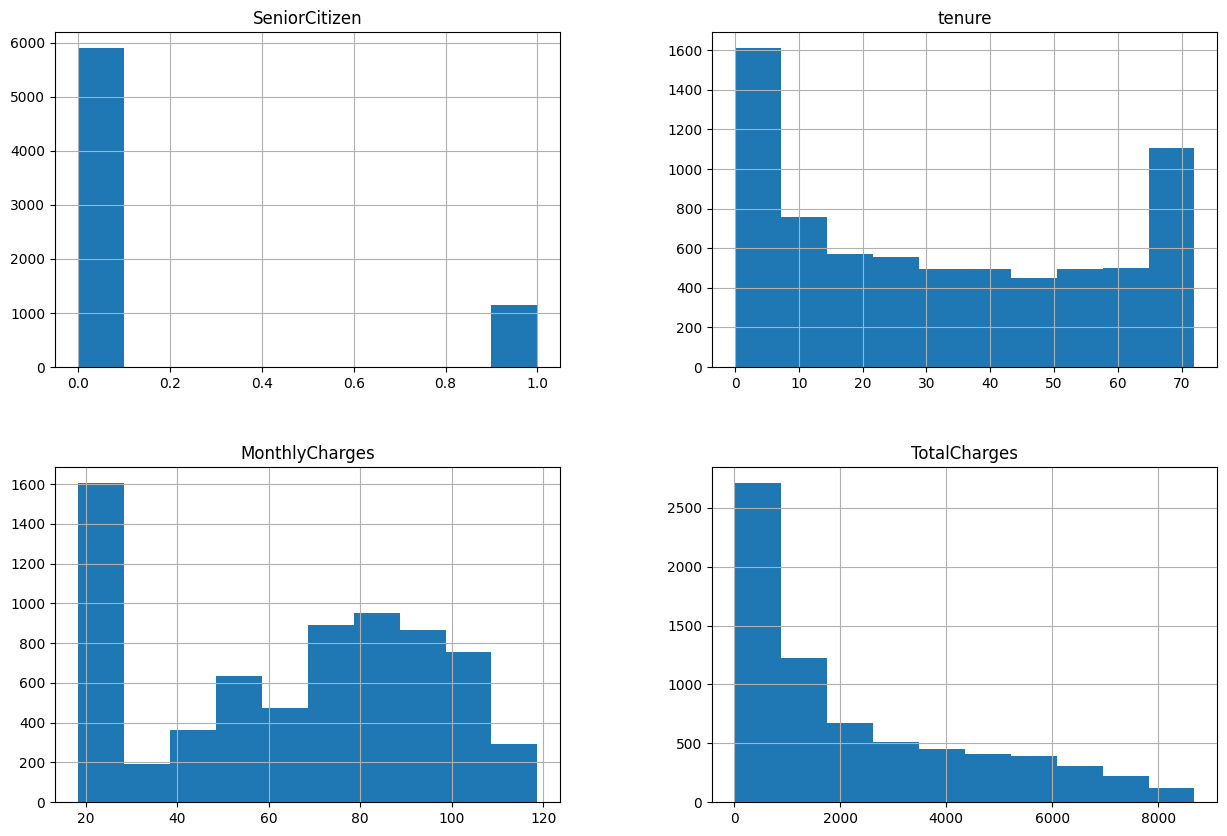

In [1130]:
#analyzing each numerical column
data.hist(figsize=[15,10])
plt.show()

In [1131]:
data["SeniorCitizen"]=data["SeniorCitizen"].fillna(data["SeniorCitizen"].mode()[0])
data["tenure"]=data["tenure"].fillna(data["tenure"].mean())
data["MonthlyCharges"]=data["MonthlyCharges"].fillna(data["MonthlyCharges"].mean())
data["TotalCharges"]=data["TotalCharges"].fillna(data["TotalCharges"].median())


handle the missing values in object type with mode

In [1132]:
object_columns = data.select_dtypes(include=object).columns
print(object_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [1133]:
for i in ['PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']:
  data[i]=data[i].fillna(data[i].mode()[0])

In [1134]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# checking for outlier

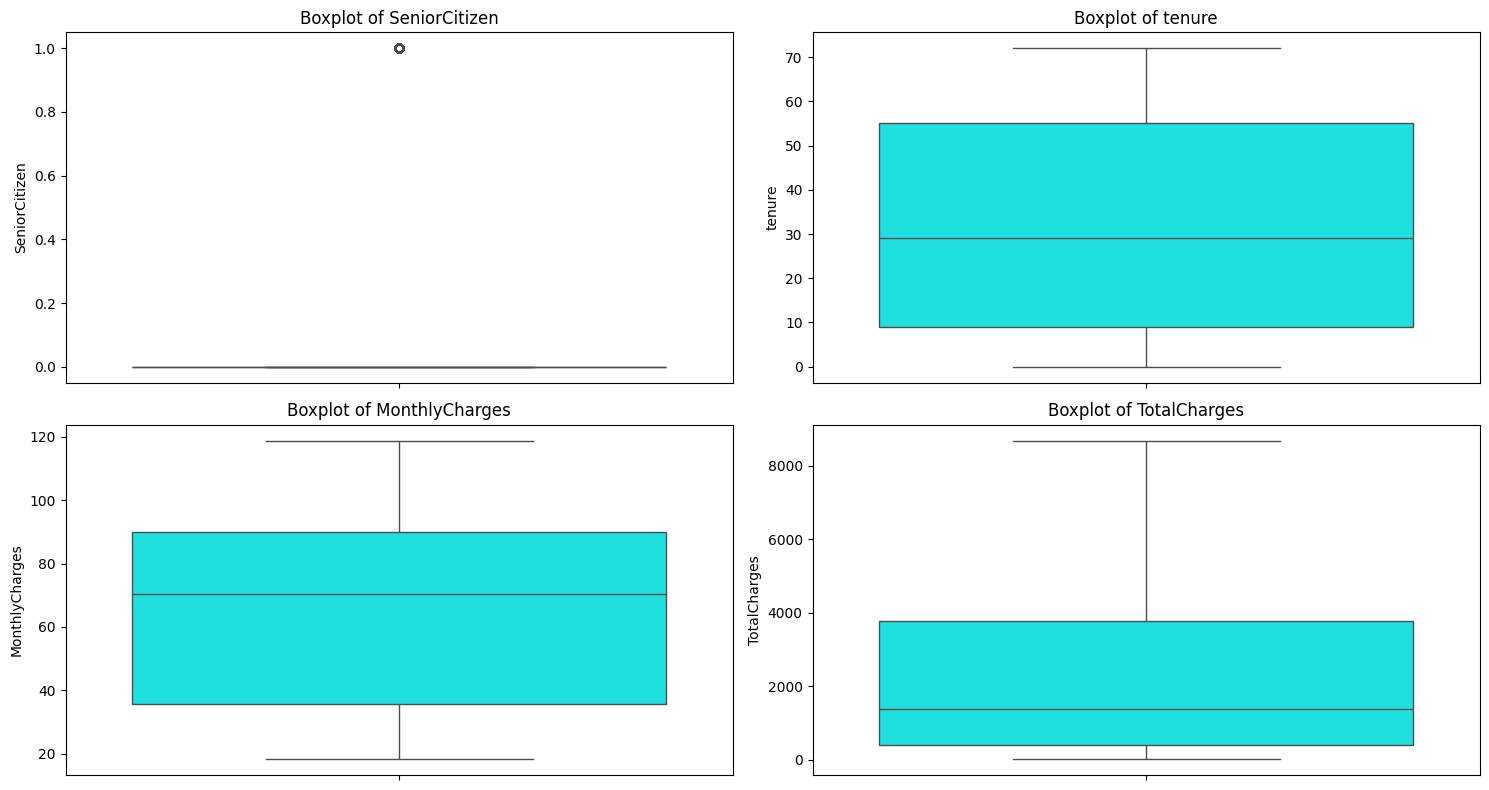

In [1135]:
# List of numerical columns to analyze

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


There is no outlier to be handled

# Univariate analysis

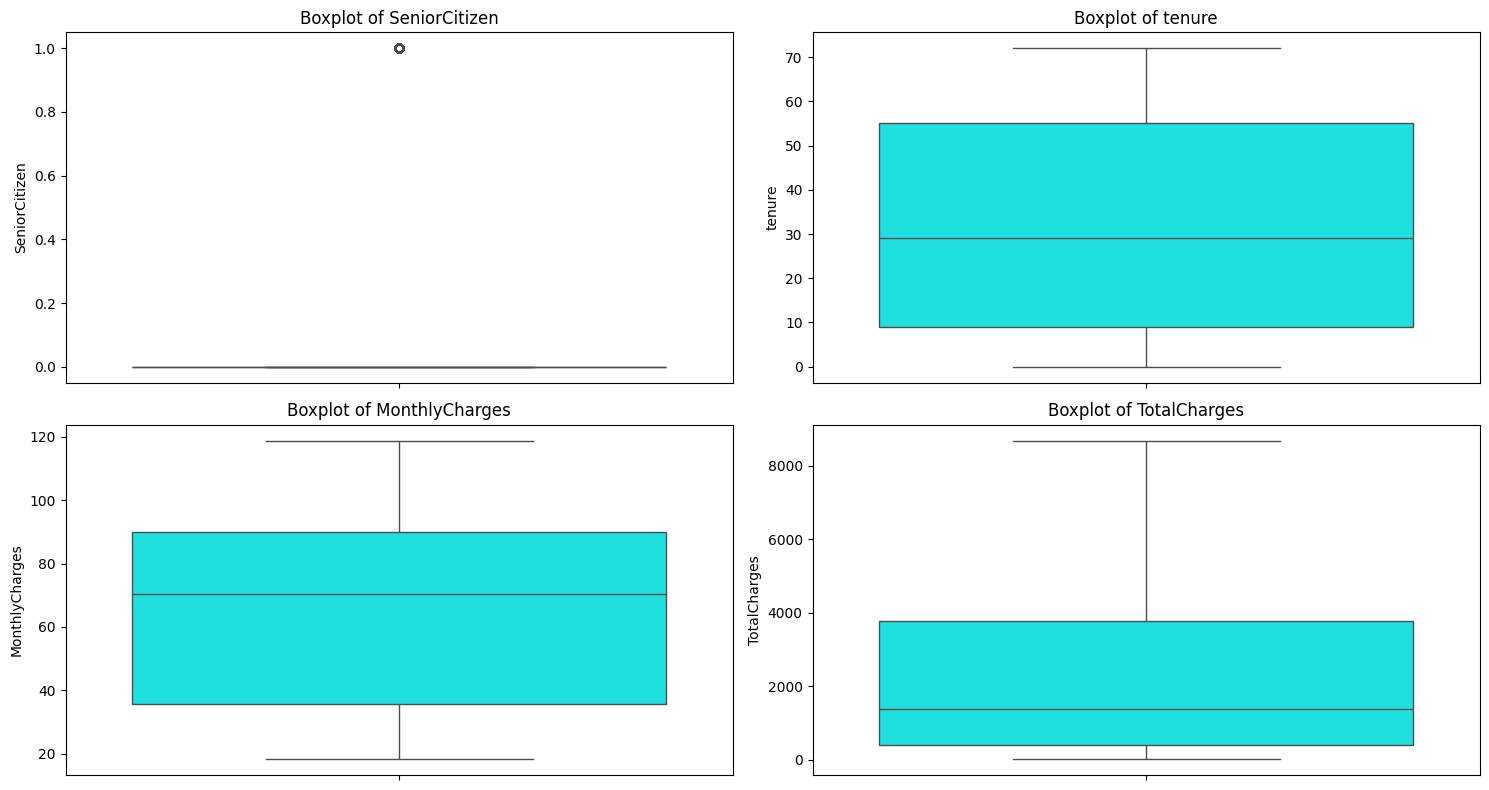

In [1136]:
# List of numerical columns to analyze

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

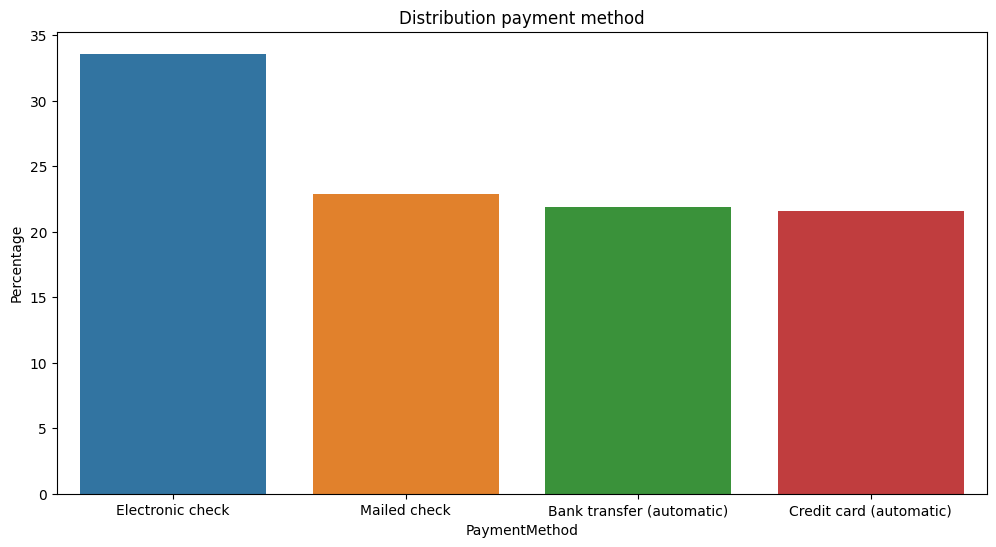

In [1137]:
plt.figure(figsize=(12, 6))  # Set figure size (Width=12, Height=6)
sns.countplot(data, x="PaymentMethod", hue="PaymentMethod", stat="percent")
plt.ylabel('Percentage')
plt.title('Distribution payment method')
plt.show()

<ipython-input-1138-29b3ef02e12f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='gender',palette ='viridis')


<Axes: xlabel='gender', ylabel='count'>

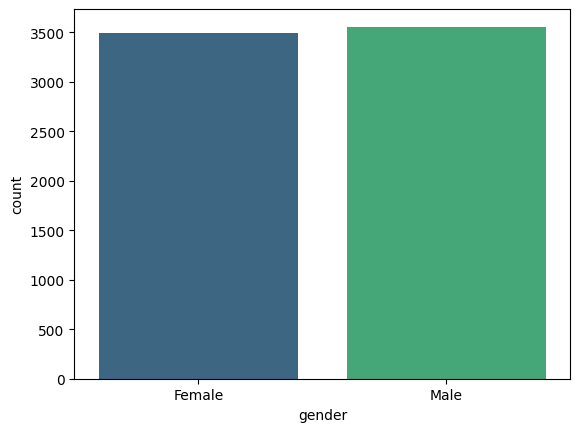

In [1138]:
sns.countplot(data=data,x='gender',palette ='viridis')

<ipython-input-1139-4b8a9b1ad9ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='SeniorCitizen',palette ='viridis')


<Axes: xlabel='SeniorCitizen', ylabel='count'>

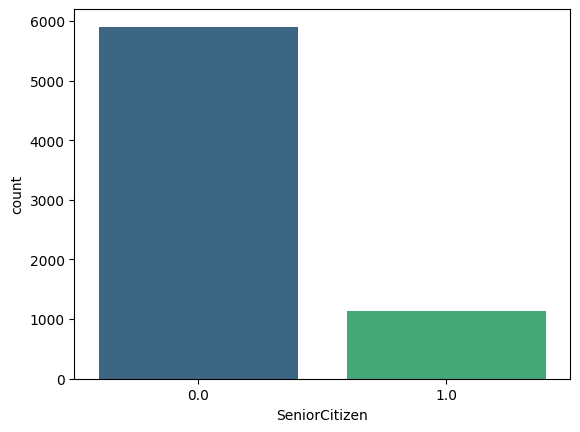

In [1139]:
sns.countplot(data=data,x='SeniorCitizen',palette ='viridis')

<ipython-input-1140-aac2d39726d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Partner',palette ='viridis')


<Axes: xlabel='Partner', ylabel='count'>

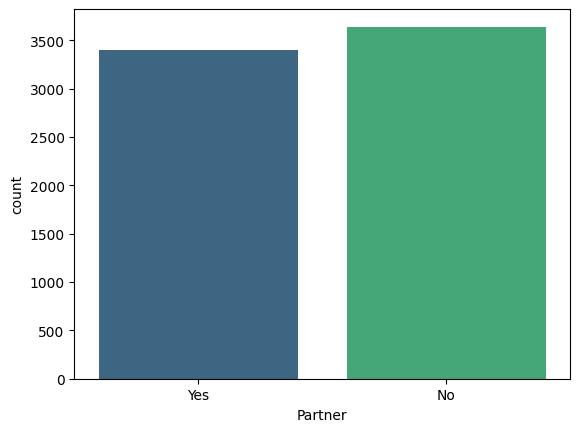

In [1140]:
sns.countplot(data=data,x='Partner',palette ='viridis')

<ipython-input-1141-bf4d4d918410>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='PhoneService',palette ='viridis')


<Axes: xlabel='PhoneService', ylabel='count'>

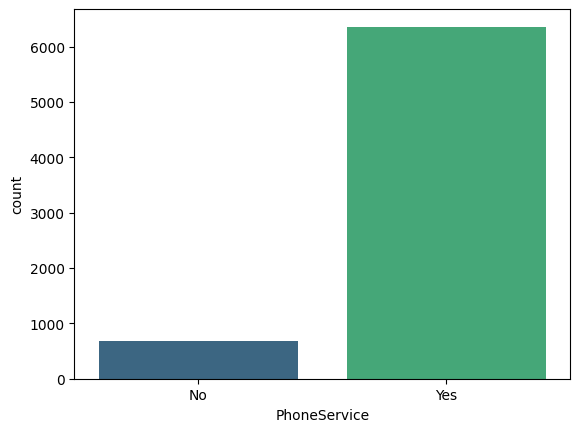

In [1141]:
sns.countplot(data=data,x='PhoneService',palette ='viridis')

<ipython-input-1142-11608f22c1ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Contract',palette ='viridis')


<Axes: xlabel='Contract', ylabel='count'>

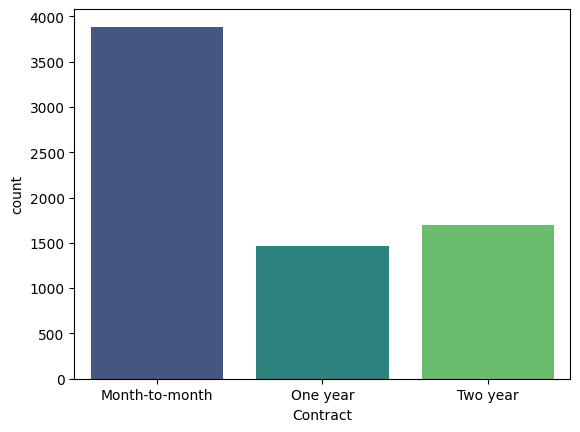

In [1142]:
sns.countplot(data=data,x='Contract',palette ='viridis')

# Bivariate analysis

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

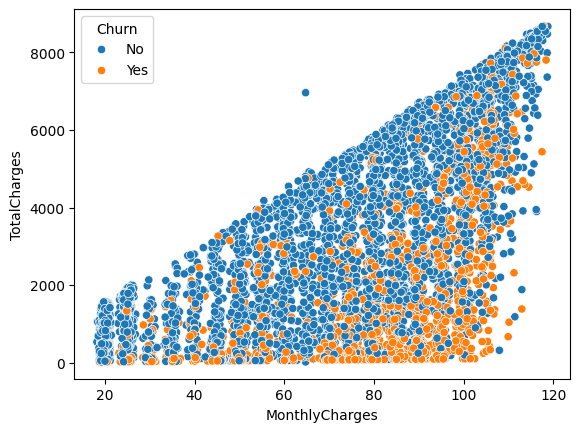

In [1143]:
sns.scatterplot(data =data,x="MonthlyCharges",y='TotalCharges',hue ='Churn')

<Axes: xlabel='Churn', ylabel='PaymentMethod'>

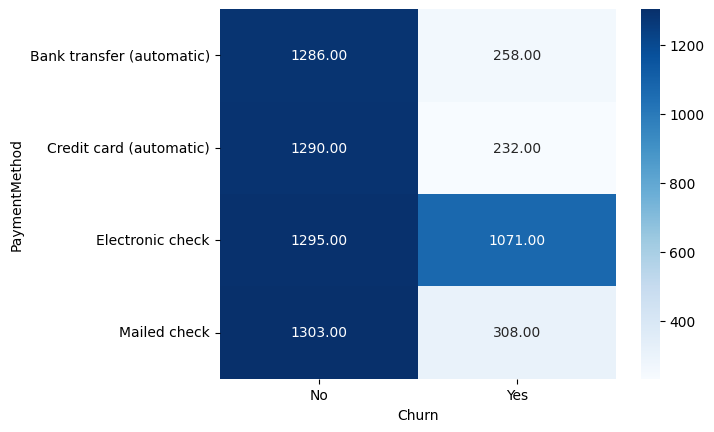

In [1144]:

cross_tab =pd.crosstab(data['PaymentMethod'],data['Churn'])
cross_tab
sns.heatmap(cross_tab,annot=True,fmt='.2f',cmap='Blues')

SeniorCitizen   0.0  1.0
Churn                   
No             4508  666
Yes            1395  474


<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

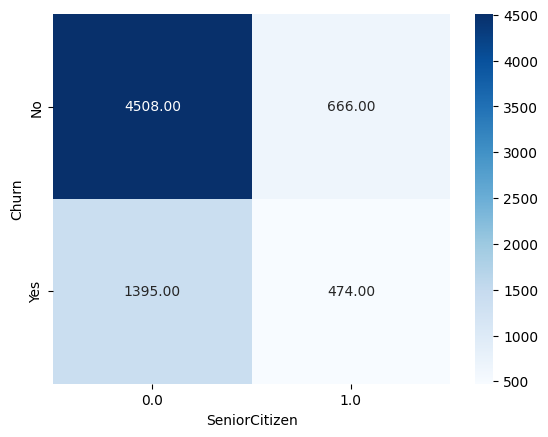

In [1145]:
cross_tab = pd.crosstab(data['Churn'], data['SeniorCitizen'])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues')

PhoneService   No   Yes
Churn                  
No            512  4662
Yes           169  1700


<Axes: xlabel='PhoneService', ylabel='Churn'>

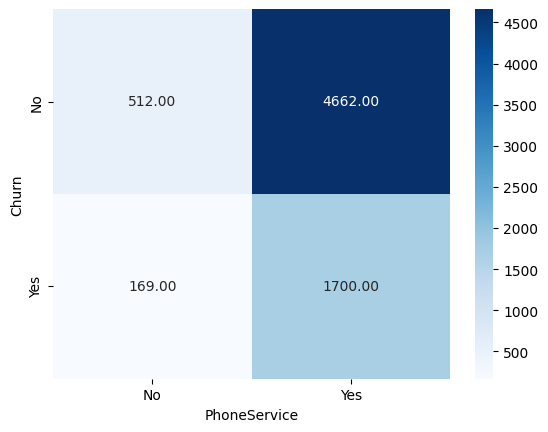

In [1146]:
cross_tab = pd.crosstab(data['Churn'], data['PhoneService'])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues')

InternetService   DSL  Fiber optic    No
Churn                                   
No               1951         1817  1406
Yes               456         1301   112


<Axes: xlabel='InternetService', ylabel='Churn'>

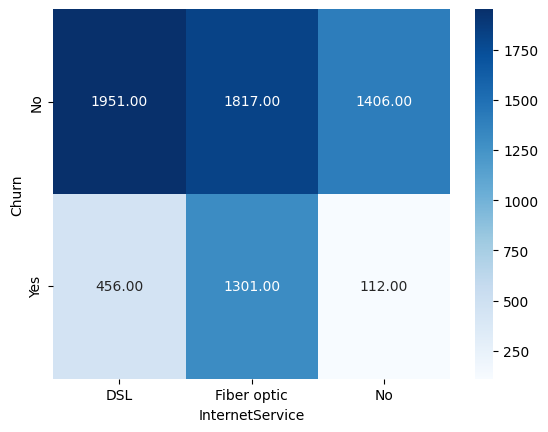

In [1147]:
cross_tab = pd.crosstab(data['Churn'], data['InternetService'])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues')

PhoneService      No   Yes
InternetService           
DSL              680  1727
Fiber optic        1  3117
No                 0  1518


<Axes: xlabel='PhoneService', ylabel='InternetService'>

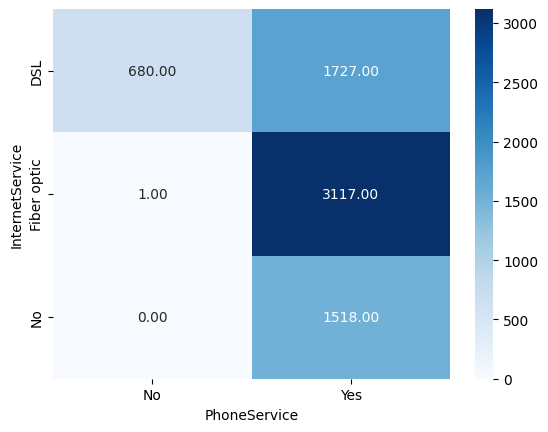

In [1148]:
cross_tab = pd.crosstab(data['InternetService'], data['PhoneService'])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues')

# Multivariate Analysis

<Axes: >

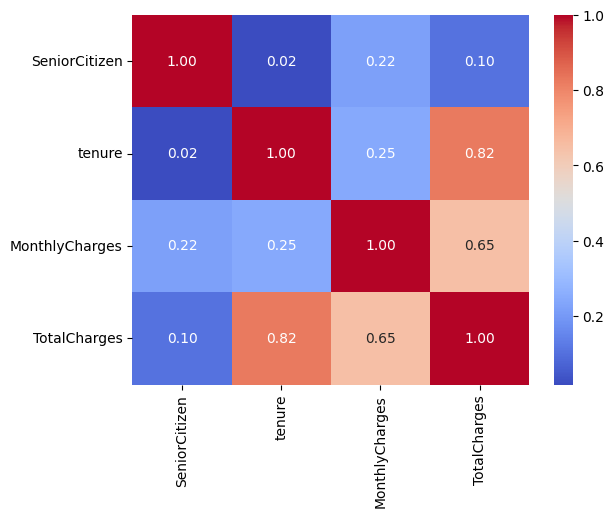

In [1149]:
#correlation
corr_matrix = data[num_col].corr()
corr_matrix


#plot heatmap
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')

In [1150]:
data.drop('customerID',axis=1,inplace=True)

In [1151]:
type(data)

pandas.core.frame.DataFrame

# Label encoding

In [1152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in cols_to_encode:
    data[col] = le.fit_transform(data[col])


In [1154]:
# Columns to one-hot encode
onehot_cols = [
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies","MultipleLines","Contract","PaymentMethod"]


# Perform one-hot encoding on these columns
data = pd.get_dummies(data, columns=onehot_cols, drop_first=True,dtype=int)


In [1155]:
type(data)

pandas.core.frame.DataFrame

In [1156]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(int)

In [1157]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,1,29.85,29.85,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2.0,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


# Scaling

In [1158]:
y = data['Churn']
x=data.drop('Churn',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [1159]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
float_col=data[['tenure','MonthlyCharges','TotalCharges']]
float_col = min_max.fit_transform(float_col)
float_col

array([[0.01388889, 0.11542289, 0.0012751 ],
       [0.47222222, 0.38507463, 0.21586661],
       [0.02777778, 0.35422886, 0.01031041],
       ...,
       [0.15277778, 0.11293532, 0.03780868],
       [0.05555556, 0.55870647, 0.03321025],
       [0.91666667, 0.86965174, 0.78764136]])

In [1160]:
float_col=pd.DataFrame(float_col,columns =['tenure','MonthlyCharges','TotalCharges'])

In [1161]:
x=x.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
x=pd.concat([x,float_col],axis =1)

In [1162]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0.013889,0.115423,0.001275
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0.472222,0.385075,0.215867
2,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0.027778,0.354229,0.010310
3,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0.625000,0.239303,0.210241
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0.027778,0.521891,0.015330


In [1163]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [1164]:
#correlation
corr_matrix = x.corr()
corr_matrix



,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.002639,-0.001808,0.010517,-0.006016,-0.011203,-0.010766,0.006064,0.005695,-0.017647,...,0.006016,-0.008404,0.007713,-0.003355,0.001215,0.001050,0.013412,0.005496,-0.014914,-0.000551
SeniorCitizen,-0.002639,1.000000,0.016464,-0.210830,0.010733,0.155837,0.254023,-0.182537,-0.182141,-0.037397,...,-0.010733,0.144240,-0.044903,-0.116281,-0.023748,0.170605,-0.153051,0.017916,0.220814,0.103519
Partner,-0.001808,0.016464,1.000000,0.452676,0.017253,-0.014226,0.002805,-0.000168,0.000926,0.143170,...,-0.017253,0.141469,0.082496,0.247874,0.082029,-0.083532,-0.095495,0.379583,0.096539,0.317961
Dependents,0.010517,-0.210830,0.452676,1.000000,-0.002077,-0.109783,-0.162943,0.139624,0.140588,0.079533,...,0.002077,-0.025661,0.068563,0.203938,0.060267,-0.150167,0.058567,0.158885,-0.113862,0.063152
PhoneService,-0.006016,0.010733,0.017253,-0.002077,1.000000,0.017678,0.290638,0.171493,0.171853,-0.093958,...,-1.000000,0.279138,-0.003846,0.002927,-0.007978,0.003837,-0.003694,0.007799,0.246991,0.112990
PaperlessBilling,-0.011203,0.155837,-0.014226,-0.109783,0.017678,1.000000,0.327584,-0.320350,-0.321349,-0.004110,...,-0.017678,0.161875,-0.051874,-0.148818,-0.012702,0.207539,-0.205008,0.006217,0.351302,0.158791
InternetService_Fiber optic,-0.010766,0.254023,0.002805,-0.162943,0.290638,0.327584,1.000000,-0.467184,-0.464693,-0.033642,...,-0.290638,0.361530,-0.076051,-0.212143,-0.049869,0.333806,-0.304353,0.018975,0.781124,0.358477
InternetService_No,0.006064,-0.182537,-0.000168,0.139624,0.171493,-0.320350,-0.467184,1.000000,0.997905,-0.331595,...,-0.171493,-0.208740,0.037447,0.218481,0.002482,-0.283623,0.319615,-0.038968,-0.760175,-0.373443
OnlineSecurity_No internet service,0.005695,-0.182141,0.000926,0.140588,0.171853,-0.321349,-0.464693,0.997905,1.000000,-0.332291,...,-0.171853,-0.209264,0.038218,0.219673,0.001574,-0.284512,0.320759,-0.038596,-0.761781,-0.374093
OnlineSecurity_Yes,-0.017647,-0.037397,0.143170,0.079533,-0.093958,-0.004110,-0.033642,-0.331595,-0.332291,1.000000,...,0.093958,0.098643,0.100626,0.191547,0.115287,-0.112607,-0.079646,0.326327,0.294837,0.409789


In [1165]:
y.value_counts()


,count
Churn,
0,5174
1,1869


In [1166]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)



# Logestic Regression

In [1167]:
from sklearn.linear_model import LogisticRegression
logit_model  = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1168]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('confusion matrix :',confusion_matrix(y_test,y_pred))
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[1038  244]
 [ 150  329]]
Accuracy is : 0.7762634866553095
Precision is 0.5741710296684118
Recall is : 0.6868475991649269
f1 score is : 0.6254752851711026


#SVC

In [1169]:
from sklearn.svm import SVC   # svr
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred_svc = svm_model.predict(x_test)
acc_svc = accuracy_score(y_test,y_pred_svc)  # msc and R2
print(acc_svc)

0.6774559909142532


#navies bayes


In [1170]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

# predict
y_pred_nb = gnb.predict(x_test)

# metrics

print(accuracy_score(y_test,y_pred_nb))

0.7189097103918228


#Decision tree

In [1171]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

[[1001  281]
 [ 218  261]]
0.7166382737081204


# Rondom forest

In [1172]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.768313458262351
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1282
           1       0.57      0.57      0.57       479

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761

Confusion Matrix:
 [[1079  203]
 [ 205  274]]


In [1173]:
clustering_results = pd.DataFrame({
    "methods":["Logestic Regression","svc","navies bayes","Decision Tree","rondom forest",],
    "Accuracy":[0.7762634866553095,0.6774559909142532,0.7189097103918228,0.7143668370244179,0.768313458262351]
})
clustering_results

,methods,Accuracy
0,Logestic Regression,0.776263
1,svc,0.677456
2,navies bayes,0.718910
3,Decision Tree,0.714367
4,rondom forest,0.768313


# Logestic Regression has more accuracy than Random forest,hence it can be used for classification of the data.
